# *__Customer's Intention Clustering and Classification Project__*





###  __About This Project__ :
- In this project, I will analyze the Customer's Intentions based on the transactions made online in a one year duration.



### __Goals__: 
- Cluster the groups using the BounceRates to identify which customers are more likely to be the interested(More likely to make a transaction) customers.
- Classify the customers whether he/she is a customer who is going to generate a revenue or not. I will use  LogisticRegression,SVM, KNN and RandomForestClassifier as the classification models.

## __About The Data__ :

- The Data from Kaggle : https://www.kaggle.com/roshansharma/online-shoppers-intention

### *Source*:
1. *C. Okan Sakar*

   Department of Computer Engineering, Faculty of
   Engineering and Natural Sciences, Bahcesehir University,
   34349 Besiktas, Istanbul, Turkey
    
    
2. *Yomi Kastro*

   Inveon Information Technologies Consultancy and Trade,
   34335 Istanbul, Turkey*
    
    
### *Dataset and Attribute Information* :

#### *Dataset* :
- The dataset consists of feature vectors belonging to 12,330 sessions.
    The dataset was formed so that each session
    would belong to a different user in a 1-year period to avoid
    any tendency to a specific campaign, special day, user
    profile, or period.
    
#### *Attribute* :

- *__Revenue__* => class whether it can make a revenue or not
- *__Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related  Duration__*  => represent the number of different types of pages visited by the visitor in that session and total time spent in                        each of these page categories.
- *__Bounce Rate__* => percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other                        requests to the analytics server during that session
- *__Exit Rate__*   => the percentage that were the last in the session
- *__Page Value__*  => feature represents the average value for a web page that a user visited before completing an e-commerce                                transaction
- *__Special Day__* => indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day)                      in which the sessions are more likely to be finalized with transaction. For example, for Valentina’s day, this value                  takes a nonzero value between February 2 and February 12, zero,before and after this date unless it is close to                        another special day, and its maximum value of 1 on February 8
- *__Operating system,browser, region, traffic type__* => Different types of operating systems, browser, region and traffic type used to                                                         visit the website
- *__Visitor type__* => Whether the customer is a returning or new visitor
- *__Weekend__*     => A Boolean value indicating whether the date of the visit is weekend
- *__Month__*        => Month of the year.



    
    


### *Importing Modules*

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### *Loading the Data*

In [5]:
data = pd.read_csv("C:\\Users\\andyj\\Desktop\\Kaggle Projects\\Customer's Intention\\online_shoppers_intention.csv")

In [6]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [7]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## *Cleaning Data*

#### - This table  shows the proportion of null variables in each columns

In [8]:
null_table = pd.DataFrame(data.isnull().sum().values.reshape(1,-1), columns = data.isnull().sum().index)
null_table = null_table.rename(index = {0:'Total Null Values'})
null_pct = null_table.iloc[0,:]/12330 *100
null_pct = pd.DataFrame(null_pct.values.reshape(1,-1), columns = null_pct.index)
null_pct = null_pct.rename(index = {0 : 'Null %'})
null_table = null_table.append(null_pct)
null_table

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Total Null Values,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null %,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### - The null values from the 1st column('Administrative') to 8th column('ExitRates') have less than 0.2% of null values, therefore, I will remove all the null values

In [9]:
# Cleaning
data = data.dropna()
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


#### - However, if we take a look at the Duration columns, there are some negative durations which does not make sense. There was no further descriptions about the negative durations.

In [10]:
neg_ad_dur = data[data['Administrative_Duration'] < 0]
neg_info_dur = data[data['Informational_Duration'] < 0]
neg_prd_dur = data[data['ProductRelated_Duration'] < 0]
print(" The length of each durations are {} ,{} , {}".format(len(neg_ad_dur), len(neg_info_dur),len(neg_prd_dur)))

 The length of each durations are 33 ,33 , 33


#### -  Since there are only 33 negative durations for each of the durations, therefore, drop them as well.

In [11]:
# Dropping the negative Durations
data = data.drop(data[data['Administrative_Duration'] < 0].index)
data = data.drop(data[data['Informational_Duration'] < 0].index)
data = data.drop(data[data['ProductRelated_Duration'] < 0].index)
#Checking , no negative values
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.323862,81.126229,0.505333,34.601780,31.846536,1199.253065,0.021723,0.042611,5.911793,0.061532,2.124318,2.356997,3.147114,4.071969
std,3.325128,177.046838,1.272138,141.002498,44.521443,1915.935446,0.047686,0.047964,18.600350,0.199122,0.911718,1.717264,2.401981,4.025428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.100000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003077,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.950000,0.000000,0.000000,38.000000,1470.909852,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### - *Now the data is all clean!!*

## *EDA On the Dataset*

### *General analysis of the dataset*

#### - *In order to understand more about the data, let's observe the dataset with some analysis tools*

### -  __Countplots which count the number of customers in various features__

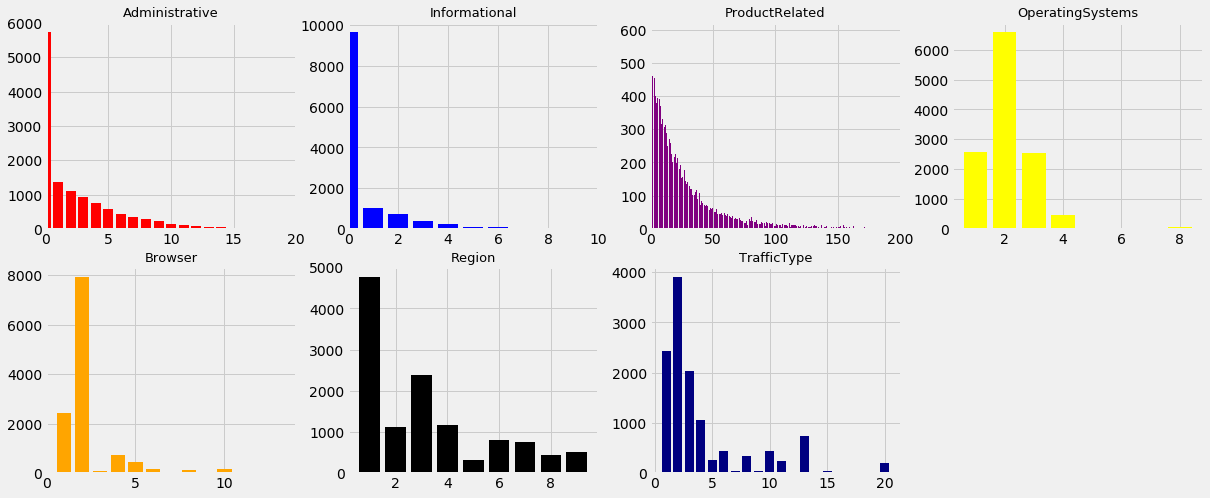

In [12]:
# Countplots on 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (17,7))
fig.tight_layout()

#fig.suptitle('Countplots Of Some Features')    Main TItle
ax[0,0].bar(data['Administrative'].value_counts().index,data['Administrative'].value_counts().values,color = 'red')
ax[0,0].set_title('Administrative',size=13)
ax[0,0].set_xlim(0,20)

ax[0,1].bar(data['Informational'].value_counts().index,data['Informational'].value_counts().values,color = 'blue')
ax[0,1].set_title('Informational',size=13)
ax[0,1].set_xlim(0,10)

ax[0,2].bar(data['ProductRelated'].value_counts().index,data['ProductRelated'].value_counts().values,color = 'purple')
ax[0,2].set_title('ProductRelated',size=13)
ax[0,2].set_xlim(0,200)

ax[0,3].bar(data['OperatingSystems'].value_counts().index,data['OperatingSystems'].value_counts().values,color = 'yellow')
ax[0,3].set_title('OperatingSystems',size=13)

ax[1,0].bar(data['Browser'].value_counts().index,data['Browser'].value_counts().values,color = 'orange')
ax[1,0].set_title('Browser',size=13)

ax[1,1].bar(data['Region'].value_counts().index,data['Region'].value_counts().values,color = 'black')
ax[1,1].set_title('Region',size=13)


ax[1,2].bar(data['TrafficType'].value_counts().index,data['TrafficType'].value_counts().values,color = 'navy')
ax[1,2].set_title('TrafficType',size=13)

fig.delaxes(ax[1,3])   # since it is a odd number plots, delete last subplot

### - __Pie charts which show the quantity ratios of several categorical columns__

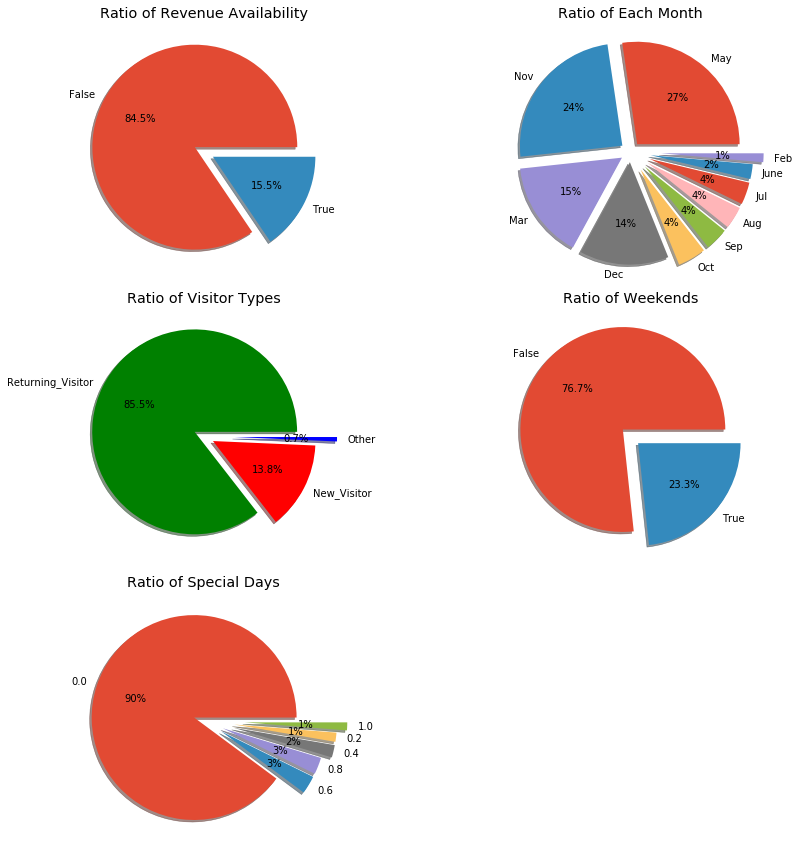

In [13]:
# Lets see other categorical features with pie chart
plt.style.use('ggplot')
fig,ax = plt.subplots(3,2,figsize=(10,6))
fig.set_figheight(12)
fig.set_figwidth(12)
plt.tight_layout()
# Revenue
ax[0,0].pie(data['Revenue'].value_counts().values,labels = ['False','True'],explode = [0.1,0.1],shadow = True,autopct='%1.1f%%')
ax[0,0].set_title('Ratio of Revenue Availability')


# Month() No Jan and April
ax[0,1].pie(data['Month'].value_counts().values,labels= data['Month'].value_counts().index[:],shadow = True, explode = [0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.3],autopct='%1.0f%%')
ax[0,1].set_title('Ratio of Each Month')

# Visitor Types
ax[1,0].pie(data['VisitorType'].value_counts().values,labels= data['VisitorType'].value_counts().index[:],explode = [0.1,0.1,0.3],shadow = True,autopct='%1.1f%%',colors=['green','red','blue'])
ax[1,0].set_title('Ratio of Visitor Types')

# Weekend
ax[1,1].pie(data['Weekend'].value_counts().values,labels= data['Weekend'].value_counts().index[:],explode = [0.1,0.1],shadow = True,autopct='%1.1f%%')
ax[1,1].set_title('Ratio of Weekends')

# Special Days
ax[2,0].pie(data['SpecialDay'].value_counts().values,labels= data['SpecialDay'].value_counts().index[:],explode = [0.1,0.2,0.2,0.3,0.3,0.4],shadow = True,autopct='%1.0f%%')
ax[2,0].set_title('Ratio of Special Days')

fig.delaxes(ax[2,1])

### - __Stacked-bar charts which show the ratio between False Revenue and True Revenue of some numerical and categorical columns__

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


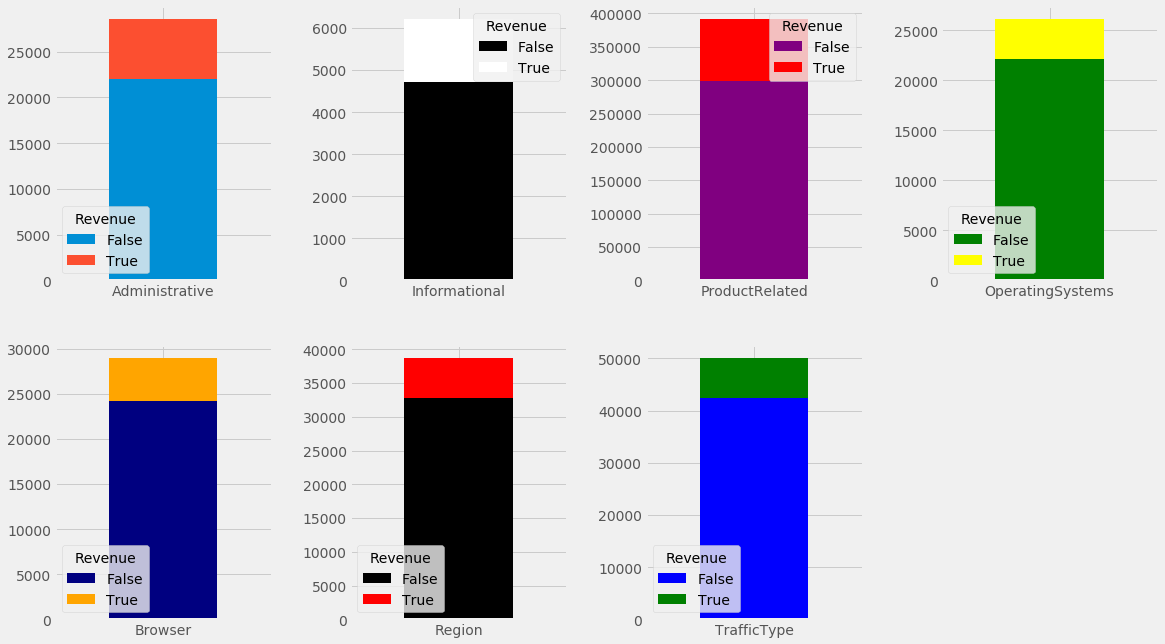

In [14]:
# Lets see the Ratio of Revenue in each types
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (17,10))
fig.tight_layout(pad = 3)


adm_rev = data[['Administrative','Revenue']]
rev_p1 = pd.DataFrame(data.groupby('Revenue')['Administrative'].sum()).T
rev_p1.plot.bar(stacked=True,ax=ax[0,0])
ax[0,0].set_xticklabels(['Administrative'], rotation=360)
plt.legend(loc='best')


info_rev = data[['Informational','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['Informational'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,1],color = ['black','white'])
ax[0,1].set_xticklabels(['Informational'], rotation=360)
plt.legend(loc='best')

info_rev = data[['ProductRelated','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['ProductRelated'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,2],color = ['purple','red'])
ax[0,2].set_xticklabels(['ProductRelated'], rotation=360)
plt.legend(loc='best')



info_rev = data[['OperatingSystems','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['OperatingSystems'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,3],color = ['green','yellow'])
ax[0,3].set_xticklabels(['OperatingSystems'], rotation=360)


info_rev = data[['Browser','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['Browser'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,0],color = ['navy','orange'])
ax[1,0].set_xticklabels(['Browser'], rotation=360)


info_rev = data[['Region','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['Region'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,1],color = ['black','red'])
ax[1,1].set_xticklabels(['Region'], rotation=360)


info_rev = data[['TrafficType','Revenue']]
rev_p2 = pd.DataFrame(data.groupby('Revenue')['TrafficType'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,2],color = ['blue','green'])
ax[1,2].set_xticklabels(['TrafficType'], rotation=360)

fig.delaxes(ax[1,3])

### - __Here are some Non-Stacked bar charts to depict the ratio between False Revenue and True Revenue of some categorical columns__

Text(0.5, 1, 'Ratio of Revenue Of Each Special Days')

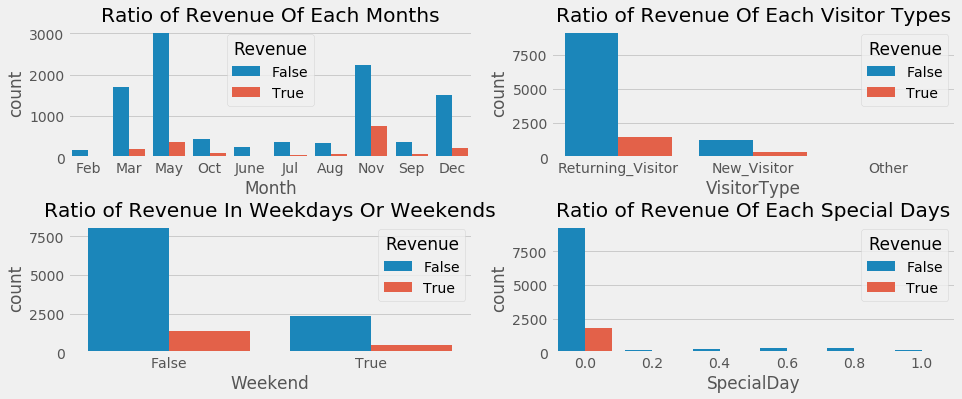

In [15]:
# Lets see the Ratio of Revenue in each categorical features
fig, ax = plt.subplots(2,2,figsize = (14,6))
plt.tight_layout(pad= 3)

month_rev = data[['Month','Revenue']]
vis_rev = data[['VisitorType','Revenue']]
weekends_rev = data[['Weekend','Revenue']]
spd_rev = data[['SpecialDay','Revenue']]

sns.countplot(x = month_rev['Month'],hue = month_rev['Revenue'],ax =ax[0,0]).set_title('Ratio of Revenue Of Each Months')
sns.countplot(x = vis_rev['VisitorType'],hue = vis_rev['Revenue'],ax =ax[0,1]).set_title('Ratio of Revenue Of Each Visitor Types')
sns.countplot(x = weekends_rev['Weekend'],hue = weekends_rev['Revenue'],ax =ax[1,0]).set_title('Ratio of Revenue In Weekdays Or Weekends')
sns.countplot(x = spd_rev['SpecialDay'],hue = spd_rev['Revenue'],ax =ax[1,1]).set_title('Ratio of Revenue Of Each Special Days')

### -  Distributions of ExitRates,BounceRates and PageValues between False/True Revenue 

Text(0.5, 1.0, 'Distribution of BounceRates Depending on Availability of Making Revenue')

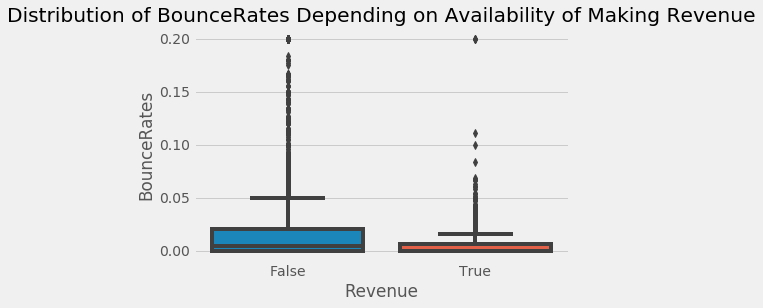

In [16]:
# lETS SEE SOME DATA RELATED TO THE BOUNCE AND EXIT RATE
sns.boxplot(x=data['Revenue'],y=data['BounceRates']).set_title('Distribution of BounceRates Depending on Availability of Making Revenue')


Text(0.5, 1.0, 'Distribution of ExitRates Depending on Availability of Making Revenue')

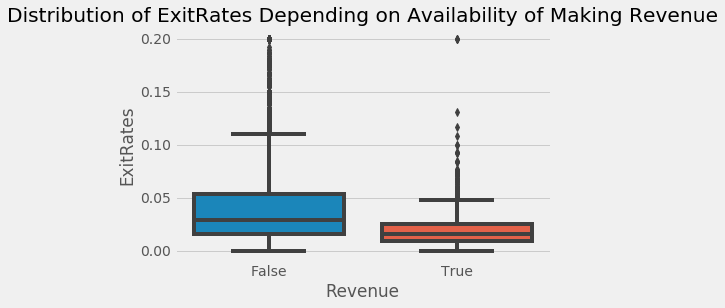

In [17]:
sns.boxplot(x=data['Revenue'],y=data['ExitRates']).set_title('Distribution of ExitRates Depending on Availability of Making Revenue')


Text(0.5, 1.0, 'Page Values depending on Availability of Making Revenue')

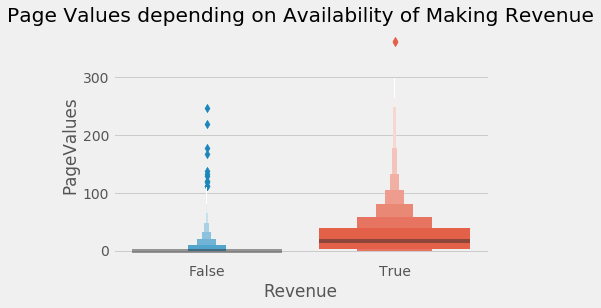

In [18]:
sns.boxenplot(x=data['Revenue'],y=data['PageValues']).set_title('Page Values depending on Availability of Making Revenue')

#### - From the observations, Customers who actually made the transactions are less likely to Exit or Bounce from the website and the pagevalues is usually higher than the Customers who did not make the purchase.

### - Scatterplots which show the correlations between two numerical features

Text(0.5, 1.0, 'ExitRates VS BounceRates')

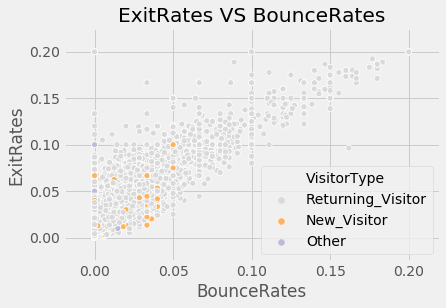

In [19]:
sns.scatterplot(data['BounceRates'],data['ExitRates'],hue = data['VisitorType'],palette='Set3_r').set_title('ExitRates VS BounceRates')

#### -  __As the BounceRates increases, the customers are more likely to exit the page__

Text(0.5, 1.0, 'Will the Exit Rates descrease as the Page Values Increase?')

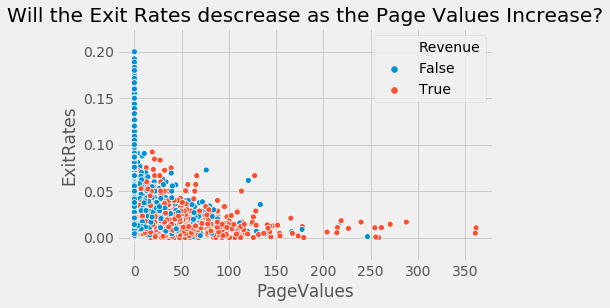

In [20]:
# Exit/Bounce Rates VS Page Values, Is higher the page value less Exit Rates?

sns.scatterplot(x= data['PageValues'],y=data['ExitRates'],hue = data['Revenue']).set_title('Will the Exit Rates descrease as the Page Values Increase?')

Text(0.5, 1.0, 'Will the Bounce Rates descreases as the Page Value Increases')

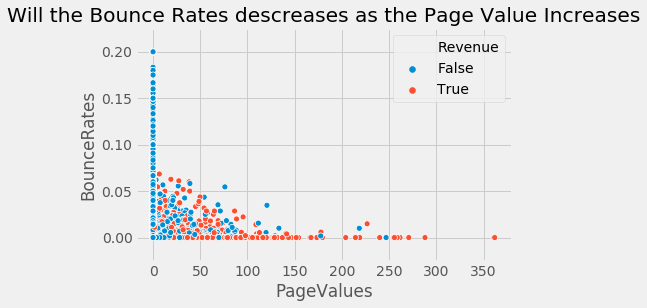

In [21]:
sns.scatterplot(x= data['PageValues'],y=data['BounceRates'],hue = data['Revenue']).set_title('Will the Bounce Rates descreases as the Page Value Increases')

#### - __By looking at the two graphs above, as the PageValues increase, the BounceRates/ExitRates decrease. As the PageValues increase, the customers are more likely to make a transactions, which leads to lower Bounce/Exit Rates__

Text(0.5, 1.0, 'Page Values VS Administrative_Duration ')

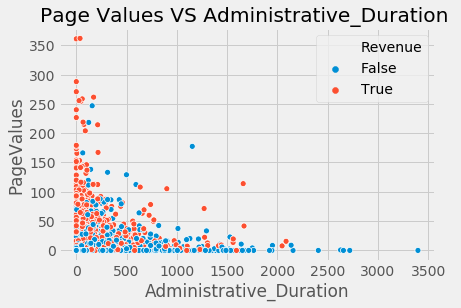

In [22]:
sns.scatterplot(x=data['Administrative_Duration'],y=data['PageValues'],hue = data['Revenue']).set_title('Page Values VS Administrative_Duration ')

Text(0.5, 1.0, 'Page Values VS Informational_Duration ')

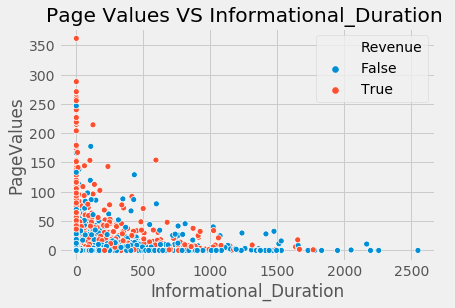

In [23]:
sns.scatterplot(x=data['Informational_Duration'],y=data['PageValues'],hue = data['Revenue']).set_title('Page Values VS Informational_Duration ')

Text(0.5, 1.0, 'Page Values VS ProductRelated_Duration ')

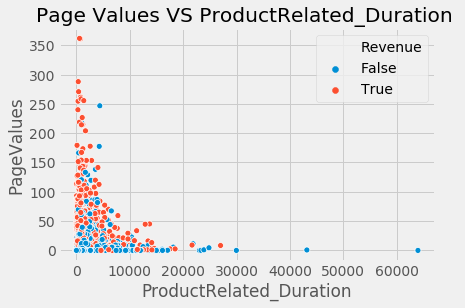

In [24]:
sns.scatterplot(x=data['ProductRelated_Duration'],y=data['PageValues'],hue = data['Revenue']).set_title('Page Values VS ProductRelated_Duration ')

#### - __As we can see, as the each types of durations increase, the PageValues decrease. Customers who make the transactions tend to stay  less on website than those who do not make the transactions__

### - Analysis of Administrative,Informational and ProductRelated Duration

Text(0.5, 1.0, 'Each Types of Durations Distribution')

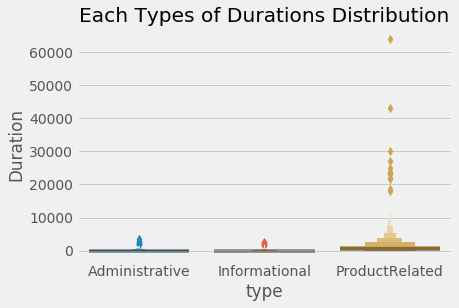

In [25]:
# Durations
admin_df = pd.DataFrame(data['Administrative_Duration'])
admin_df.rename(columns={'Administrative_Duration' :'Duration'},inplace = True)
admin_df['type'] = admin_df['Duration'].apply(lambda x:'Administrative')

inform_df= pd.DataFrame(data['Informational_Duration'])
inform_df.rename(columns={'Informational_Duration' :'Duration'},inplace =True)
inform_df['type'] = inform_df['Duration'].apply(lambda x:'Informational')

prod_df= pd.DataFrame(data['ProductRelated_Duration'])
prod_df.rename(columns={'ProductRelated_Duration' :'Duration'},inplace =True)
prod_df['type'] = prod_df['Duration'].apply(lambda x:'ProductRelated')



dur_df = pd.concat([admin_df,inform_df,prod_df])
sns.boxenplot(dur_df['type'], dur_df['Duration']).set_title('Each Types of Durations Distribution')



#### - The distribution of Administrative and Informational are very narrowly distributed compared to ProductRelated Column. Therefore, let's take a look at Administrative and Informational columns separately

Text(0.5, 1.0, 'Administrative and Informational Durations Distribution')

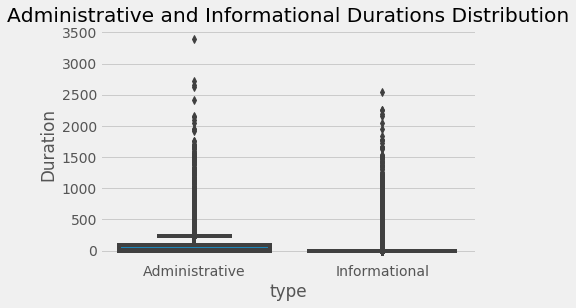

In [26]:
# Wow, the gap is too big, so lets see them 
dur_df12 = pd.concat([admin_df,inform_df])
#plt.ylim(0,500)
sns.boxplot(dur_df12['type'],dur_df12['Duration']).set_title('Administrative and Informational Durations Distribution')

In [27]:
pd.DataFrame(data['Administrative_Duration'].describe())

,Administrative_Duration
count,12283.000000
mean,81.126229
std,177.046838
min,0.000000
25%,0.000000
50%,8.000000
75%,93.950000
max,3398.750000


In [28]:
pd.DataFrame(data['Informational_Duration'].describe())

,Informational_Duration
count,12283.000000
mean,34.601780
std,141.002498
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2549.375000


In [29]:
# outliers of each columns:
# Administrative :  High : 93.95 + 93.95 (IQR)
#                   Low  : 0- 93.95
# Outliers of Administrative is larger than 187.9 and lower than - 93.95
ad_zero = data[data['Administrative_Duration'] == 0]
outlier_len = len(data[data['Administrative_Duration'] > 187.9]) 
outlier_prt = outlier_len / len(data['Administrative_Duration']) *100    # 12%
print("The % of Outliers of Administrative Duration Columns are ",outlier_prt)
ad_zero_prt = len(ad_zero)/len(data['Administrative_Duration']) *100     # 47%
print("The % of 0 Values of Administrative Duration Columns are ",ad_zero_prt)

# Informational :  High : 0
#                   Low  : 0
# Outliers of Administrative is larger than 187.9 and lower than - 93.95
info_zero = data[data['Informational_Duration'] == 0]
outlier_len2 = len(data[data['Informational_Duration'] > 0]) 
outlier_prt2 = outlier_len2 / len(data['Informational_Duration']) *100    
print("The % of Outliers of Informational Duration Column is ",outlier_prt2)
info_zero_prt = len(info_zero)/len(data['Informational_Duration']) *100     
print("The % of 0 Values of Informational Duration Column is ",info_zero_prt)


The % of Outliers of Administrative Duration Columns are  12.667915004477734
The % of 0 Values of Administrative Duration Columns are  47.683790604901084
The % of Outliers of Informational Duration Column is  19.57176585524709
The % of 0 Values of Informational Duration Column is  80.4282341447529


#### - __According to the percentages above, both of the columns contain slightly high number of outliers and high proportion of  0 values.__

### - Longer the ProductRelated Durations, more likely to make revenue?


In [30]:

prddur_rev = data.groupby('Revenue')['ProductRelated_Duration'].mean()
prddur_rev = pd.DataFrame(prddur_rev)
prddur_rev

,ProductRelated_Duration
Revenue,
False,1074.758308
True,1876.209615


#### - As the result, the average duration of ProductRelated with true Revenue is higher than with the false Revenue

### - Which month has the most number of purchases on the special days( special day == 0) ?

([<matplotlib.patches.Wedge at 0x1e3d7264608>,
 [Text(1.2901350665558484, 0.1598483970608938, 'Aug'),
  Text(0.9615764738679271, 0.8748546650179813, 'Dec'),
  Text(0.40137010301409537, 1.2364877841719484, 'Feb'),
  Text(0.1960679336660386, 1.1838738806933489, 'Jul'),
  Text(-0.04866923013653677, 1.1990126379809, 'June'),
  Text(-0.7469642164239314, 0.9645954900279091, 'Mar'),
  Text(-1.1928066618796145, -0.30018705397736833, 'May'),
  Text(0.17987221615597543, -1.1864425758776267, 'Nov'),
  Text(1.2831966821392382, -0.5598270044816085, 'Oct'),
  Text(1.388628445422354, -0.17807594044086014, 'Sep')],
 [Text(0.7939292717266757, 0.09836824434516539, '4%'),
  Text(0.5917393685341089, 0.5383721015495269, '16%'),
  Text(0.24699698647021248, 0.7609155594904297, '1%'),
  Text(0.11437296130518917, 0.6905930970711202, '4%'),
  Text(-0.028390384246313113, 0.6994240388221917, '3%'),
  Text(-0.44083134084035297, 0.5692694695246676, '17%'),
  Text(-0.7079259050179825, -0.17815979626299094, '20%'),
 

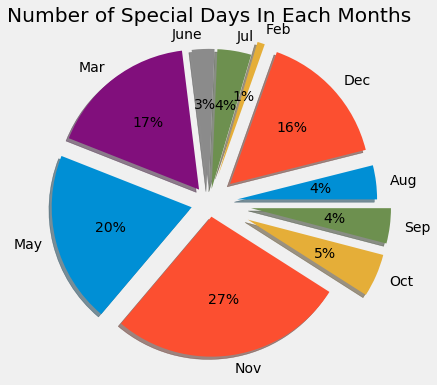

In [31]:
# WHich MOnth will have the most transactions near the SpecialDays ( =0 if close to the special days)?
spcday_0 = data[data['SpecialDay'] == 0]
data_month = spcday_0.groupby('Month')['SpecialDay'].count()
plt.figure(figsize=(13,6))
plt.title('Number of Special Days In Each Months')
plt.pie(data_month.values,labels = data_month.index,shadow =True, explode=[0.2,0.2,0.2,0.1,0.1,0.12,0.13,0.1,0.3,0.3],autopct='%1.0f%%')

### - Distribution of ExitRates,BounceRates, Each of Durations and PageValues of the Categorical Columns

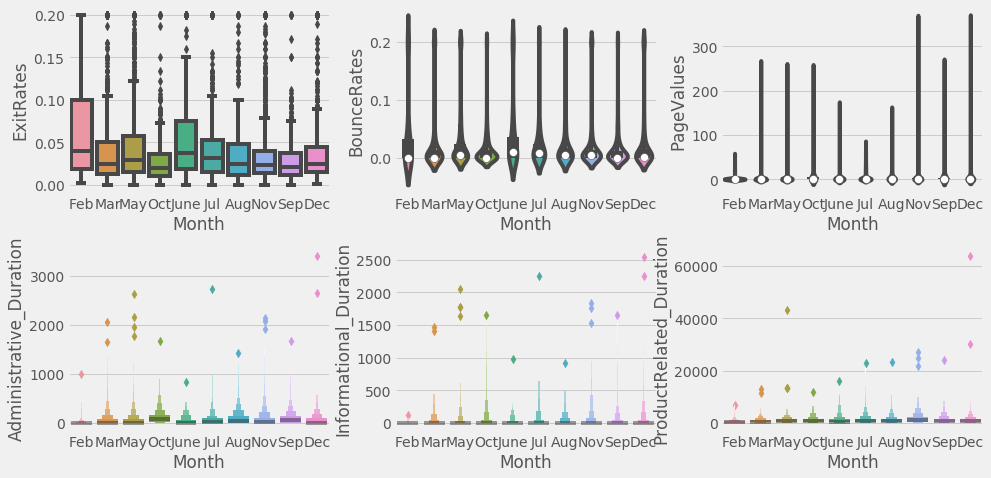

In [32]:
fig , ax = plt.subplots(2,3,figsize = (14,7))
plt.tight_layout(pad = 2)
sns.boxplot(data['Month'],data['ExitRates'],ax=ax[0,0])
sns.violinplot(data['Month'],data['BounceRates'],ax=ax[0,1])
sns.violinplot(data['Month'],data['PageValues'],ax=ax[0,2])
sns.boxenplot(data['Month'],data['Administrative_Duration'],ax = ax[1,0])
sns.boxenplot(data['Month'],data['Informational_Duration'],ax = ax[1,1])
sns.boxenplot(data['Month'],data['ProductRelated_Duration'],ax = ax[1,2])

### - Distribution of ExitRates,BounceRates and PageValues of various categorical features

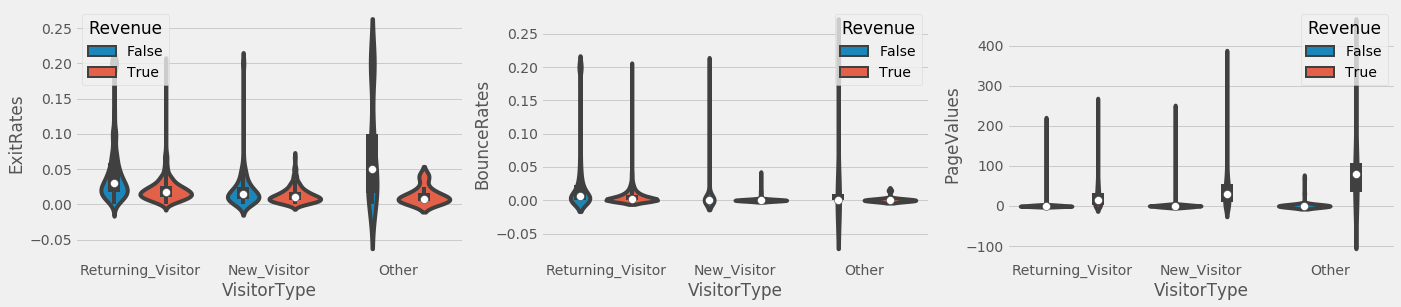

In [33]:
# Customer Types
fig , ax = plt.subplots(1,3,figsize = (20,5))
ax.flatten()
plt.tight_layout(pad =3)


sns.violinplot(data['VisitorType'],data['ExitRates'],ax = ax[0],hue = data['Revenue'])

sns.violinplot(data['VisitorType'],data['BounceRates'],ax = ax[1],hue = data['Revenue'])

sns.violinplot(data['VisitorType'],data['PageValues'],ax = ax[2],hue = data['Revenue'])


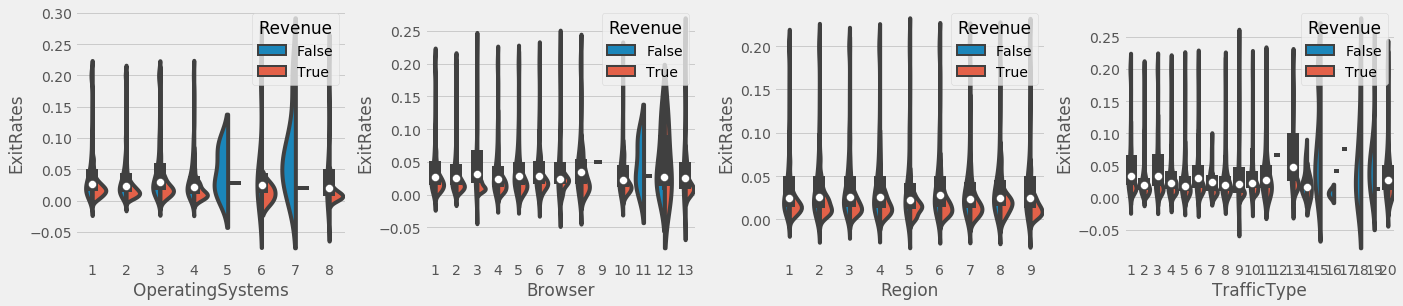

In [34]:
fig , ax = plt.subplots(1,4,figsize = (20,5))
ax.flatten()
plt.tight_layout(pad =3)

sns.violinplot(data['OperatingSystems'],data['ExitRates'],ax = ax[0],split=True,hue = data['Revenue'])
sns.violinplot(data['Browser'],data['ExitRates'],ax = ax[1],split=True,hue = data['Revenue'])
sns.violinplot(data['Region'],data['ExitRates'],ax = ax[2],split=True,hue = data['Revenue'])
sns.violinplot(data['TrafficType'],data['ExitRates'],ax = ax[3],split=True,hue = data['Revenue'])


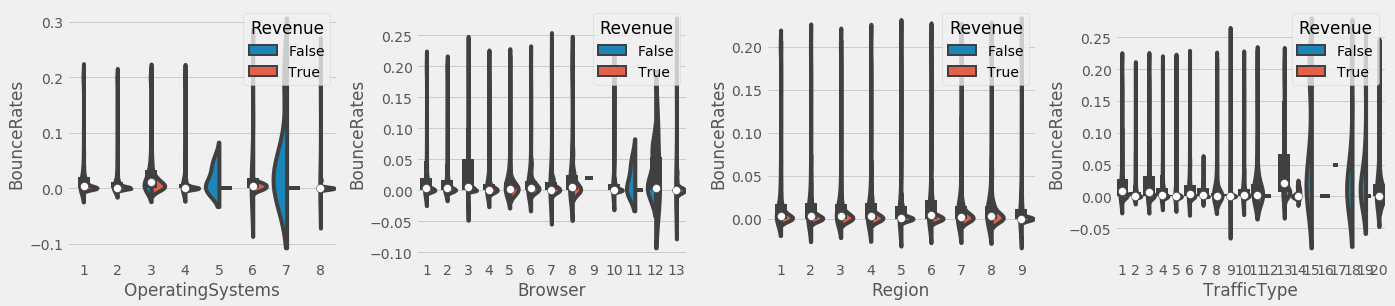

In [35]:
fig , ax = plt.subplots(1,4,figsize = (20,5))
ax.flatten()
plt.tight_layout(pad =3)

sns.violinplot(data['OperatingSystems'],data['BounceRates'],ax = ax[0],split=True,hue = data['Revenue'])
sns.violinplot(data['Browser'],data['BounceRates'],ax = ax[1],split=True,hue = data['Revenue'])
sns.violinplot(data['Region'],data['BounceRates'],ax = ax[2],split=True,hue = data['Revenue'])
sns.violinplot(data['TrafficType'],data['BounceRates'],ax = ax[3],split=True,hue = data['Revenue'])


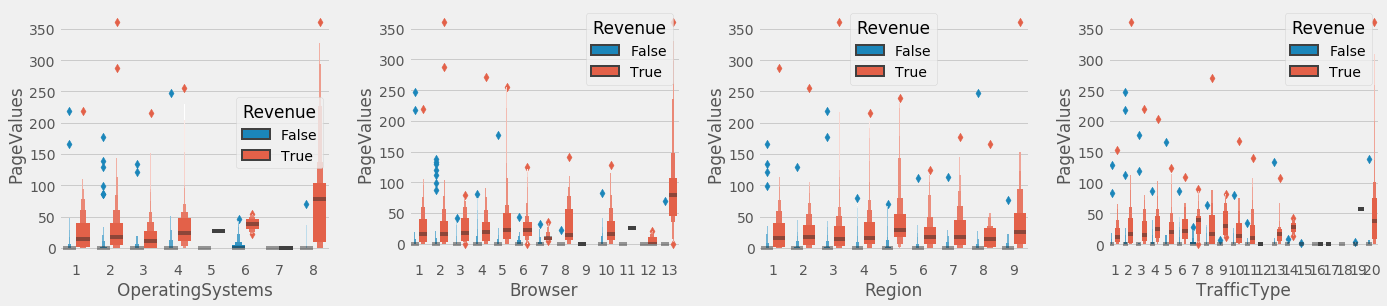

In [36]:
fig , ax = plt.subplots(1,4,figsize = (20,5))
ax.flatten()
plt.tight_layout(pad =3)

sns.boxenplot(data['OperatingSystems'],data['PageValues'],ax = ax[0],hue = data['Revenue'])
sns.boxenplot(data['Browser'],data['PageValues'],ax = ax[1],hue = data['Revenue'])
sns.boxenplot(data['Region'],data['PageValues'],ax = ax[2],hue = data['Revenue'])
sns.boxenplot(data['TrafficType'],data['PageValues'],ax = ax[3],hue = data['Revenue'])

### - Let's see which feature is most likely to be correlated with the 'Revenue' Feature?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

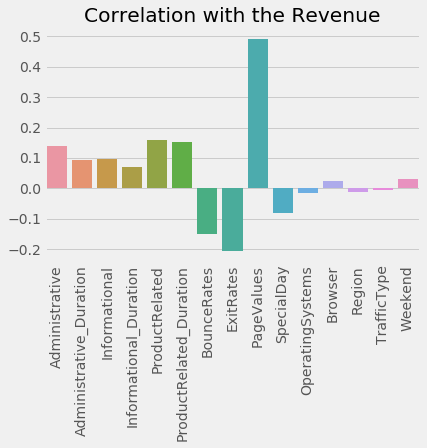

In [37]:
# Correlation with Revenue
data_corr = data.corr()['Revenue'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)

#### - Resultantly, Page Values has the highest correlation( around 0.5)  with Revenue compare to all other features. 

### *Correlation Between the Features*

(16.5, -0.5)

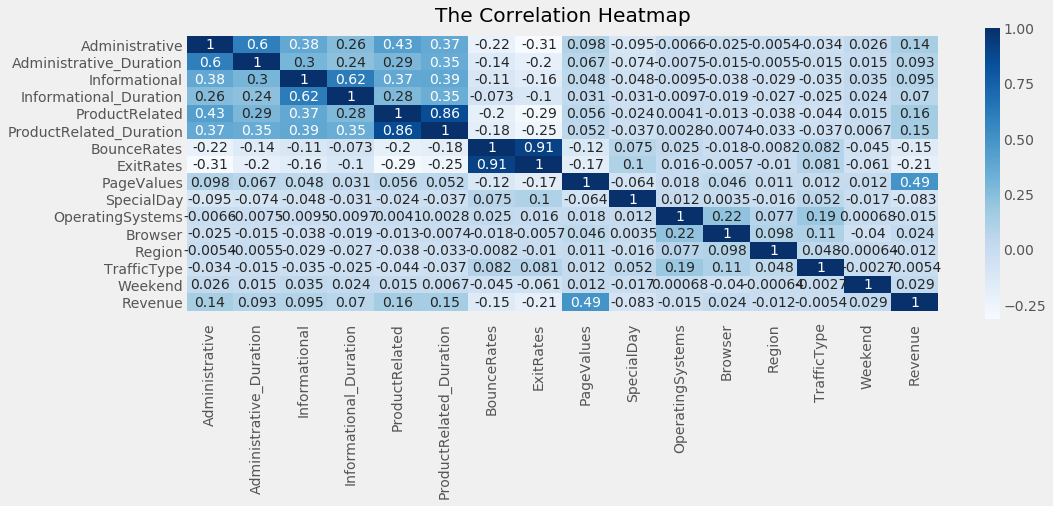

In [38]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(data.corr(),cmap='Blues',annot=True)
ax.set_title('The Correlation Heatmap')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+1,top-1)

## *Clustering Different Customer Groups*

#### -Before we go into the classifications, let's understand more about the customers intentions by clustering the customer groups. 

### *Clustering the Customers with ProductRelated_Duration and BounceRates*

In [39]:
# Lets Cluster the Group 
X = data[['ProductRelated_Duration','BounceRates']]

### *The Elbow Method*

- To find the Optimal number of clusters 

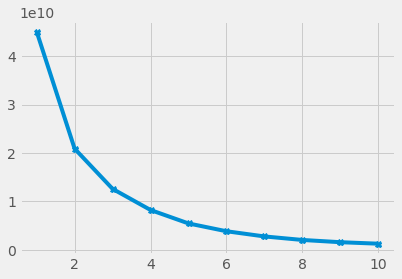

In [40]:
# THe Elbow Method

inertia =[]
for i in range(1,11):
    kms = KMeans(n_clusters=i,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(X)
    inertia.append(kms.inertia_)
plt.plot(range(1,11),inertia,marker ='X')

- The Number of Clusters will be 3 since the value rigth after the significant drop of inertia is 3

In [41]:
# 3 Cluseters
kms = KMeans(n_clusters=3,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(X)
pred = kms.fit_predict(X)

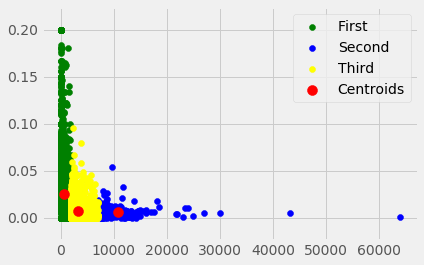

In [42]:
#plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, s=50, cmap='viridis')
plt.scatter(X.iloc[pred == 0,0],X.iloc[pred == 0,1],label='First',color ='green')
plt.scatter(X.iloc[pred == 1,0],X.iloc[pred == 1,1],label ='Second',color='blue')
plt.scatter(X.iloc[pred == 2,0],X.iloc[pred == 2,1],label='Third',color='yellow')
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='red',label='Centroids')

plt.legend(loc='best')

In [43]:
print(data[pred == 0]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is : " ,1341/8758*100,"%")

False    8758
True     1341
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is :  15.311715003425439 %


In [44]:
print(data[pred == 1]['Revenue'].value_counts())
print("The Percentage of second cluster groups who made a transactions is : " ,71/139*100,"%")

False    139
True      71
Name: Revenue, dtype: int64
The Percentage of second cluster groups who made a transactions is :  51.07913669064749 %


In [45]:
print(data[pred == 2]['Revenue'].value_counts())
print("The Percentage of third cluster groups who made a transactions is : " ,496/1478*100,"%")

False    1478
True      496
Name: Revenue, dtype: int64
The Percentage of third cluster groups who made a transactions is :  33.55886332882274 %


#### - According to the first clustering graph, second group( cluster with the lowest PageValues and longer Productrelated duration) is the groups of customers who is more interested on purchasing the products

### *Clustering the Customers with Administrative_Duration and BounceRates*

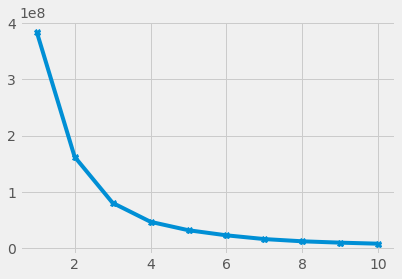

In [46]:
# Administrative The Elbow Method
inertia = []
Y = data[['Administrative_Duration','BounceRates']]
for i in range(1,11):
    kms = KMeans(n_clusters = i,max_iter=500,n_init = 10,init = 'k-means++',random_state = 100).fit(Y)
    inertia.append(kms.inertia_)
plt.plot(range(1,11),inertia,marker='X')

- The Number of Clusters will be 3 as well.

In [47]:
#3 Clusters

kms = KMeans(n_clusters = 3,max_iter=500,n_init = 10,init = 'k-means++',random_state = 100).fit(Y)
pred_a = kms.predict(Y)

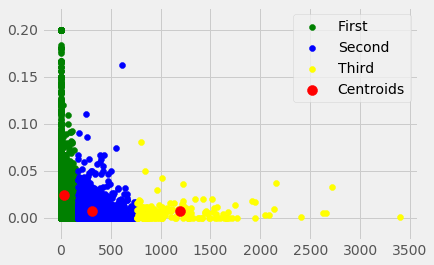

In [48]:
#plt.scatter(x=Y.iloc[:,0],y=Y.iloc[:,1],c=pred_a,cmap='viridis')
plt.scatter(Y.iloc[pred_a == 0,0],Y.iloc[pred_a == 0,1],label='First',color ='green')
plt.scatter(Y.iloc[pred_a == 1,0],Y.iloc[pred_a == 1,1],label ='Second',color='blue')
plt.scatter(Y.iloc[pred_a == 2,0],Y.iloc[pred_a == 2,1],label='Third',color='yellow')
centers = kms.cluster_centers_
plt.scatter(x=kms.cluster_centers_[:,0],y=kms.cluster_centers_[:,1],s=100,label='Centroids',color = 'red')
plt.legend(loc ='best')

In [49]:
#first group
print(data[pred_a == 0]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is : " ,1493/9062*100,"%")

False    9062
True     1493
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is :  16.475391745751487 %


In [50]:
# second group
print(data[pred_a == 1]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is : " ,382/1193*100,"%")

False    1193
True      382
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is :  32.02011735121542 %


In [51]:
# third group
print(data[pred_a == 2]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is : " ,33/120*100,"%")

False    120
True      33
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is :  27.500000000000004 %


#### - Compare to the previous clustering, the second group( Middle values of BounceRates and Administrative Duration) has slightly more customers with True Revenue

### *Clustering the Customers with Informational_Duration and BounceRates*

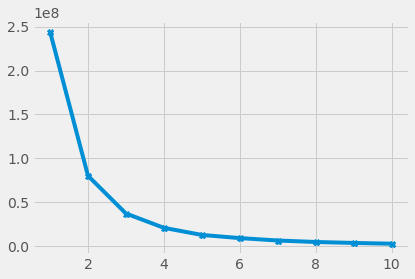

In [52]:
# Informational The Elbow Method
inertia = []
Z= data[['Informational_Duration','BounceRates']]
for i in range(1,11):
    kms = KMeans(n_clusters = i,max_iter=500,n_init = 10,init = 'k-means++',random_state = 100).fit(Z)
    inertia.append(kms.inertia_)
plt.plot(range(1,11),inertia,marker='X')

- The Number of Clusters will be 3 as well.

In [53]:
#3 Clusters

kms = KMeans(n_clusters = 3,max_iter=500,n_init = 10,init = 'k-means++',random_state = 100).fit(Z)
pred_i = kms.predict(Z)

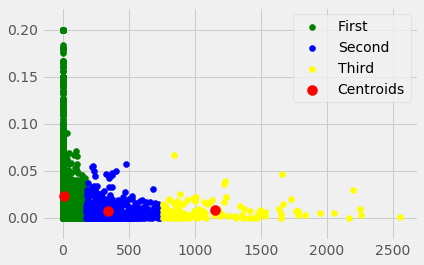

In [54]:
#plt.scatter(x=Z.iloc[:,0],y=Z.iloc[:,1],c=pred_i,cmap='viridis')
plt.scatter(Z.iloc[pred_i == 0,0],Z.iloc[pred_i == 0,1],label='First',color ='green')
plt.scatter(Z.iloc[pred_i == 1,0],Z.iloc[pred_i == 1,1],label ='Second',color='blue')
plt.scatter(Z.iloc[pred_i == 2,0],Z.iloc[pred_i == 2,1],label='Third',color='yellow')
centers = kms.cluster_centers_
plt.scatter(x=kms.cluster_centers_[:,0],y=kms.cluster_centers_[:,1],s=100,label='Centroids',color = 'red')
plt.legend(loc ='best')

In [55]:
#first group
print(data[pred_i == 0]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is : " ,1719/9896*100,"%")

False    9896
True     1719
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is :  17.370654810024252 %


In [56]:
# second group
print(data[pred_i == 1]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is : " ,158/394*100,"%")


False    394
True     158
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is :  40.10152284263959 %


In [57]:
# third group
print(data[pred_i == 2]['Revenue'].value_counts())
print("The Percentage of first cluster groups who made a transactions is : " ,31/85*100,"%")

False    85
True     31
Name: Revenue, dtype: int64
The Percentage of first cluster groups who made a transactions is :  36.470588235294116 %


#### - similar to the second clustering group,the second group( Middle values of BounceRates and Administrative Duration) also has slightly more customers with true Revenue.

### - Then.. Is it really true that the customers with Low ExitRates,Bounce Rates and high Durations of stay are more likely to generate profits?

#### __These are the tables with True Revenue__

In [58]:
data_true = data[data['Revenue'] == True][['ExitRates','BounceRates','Administrative_Duration','Informational_Duration','ProductRelated_Duration']]
data_true.describe()

,ExitRates,BounceRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,0.019555,0.005117,119.483244,57.611427,1876.209615
std,0.016463,0.012185,201.114732,171.619131,2312.214392
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009521,0.000000,0.000000,0.000000,541.906250
50%,0.016000,0.000000,52.366667,0.000000,1109.906250
75%,0.025000,0.006452,151.083333,19.000000,2266.011310
max,0.200000,0.200000,2086.750000,1767.666667,27009.859430


#### __These are the tables with False Revenue__

In [59]:
data_true = data[data['Revenue'] == False][['ExitRates','BounceRates','Administrative_Duration','Informational_Duration','ProductRelated_Duration']]
data_true.describe()

,ExitRates,BounceRates,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000
mean,0.046851,0.024777,74.072235,30.370223,1074.758308
std,0.050577,0.051037,171.333453,134.197135,1806.480766
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015497,0.000000,0.000000,0.000000,154.950000
50%,0.028571,0.004167,0.000000,0.000000,516.476191
75%,0.053333,0.020000,83.700000,0.000000,1336.899838
max,0.200000,0.200000,3398.750000,2549.375000,63973.522230


#### *- Based on the Clustering graphs and the tables, it is reasonable to say that the customers who have lower Exit/Bounce Rates with longer stays are more likely to generate profits.*

# Classification
### __Goal :__
 - To classify the customer whether he/she is interested on purchasing the products online.

### __Classification Models :__

- I will be using 4 classification models : RandomForestClassifier,Logistic Regression, Support Vector Machine and KNearestNeighbors

### - *Data Preprocessing*

- Since there are several categorical columns, therefore, we use LabelEncoder to convert the categorical columns to numerical

In [60]:
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,2,2,2,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


### *RandomForestClassifier*

In [61]:
X = data.drop('Revenue',axis=1)
y = data['Revenue']


In [62]:
# Lets make a classification model to classify whether the customer will make a transaction or not
# RandomClassification Classifier


X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.3,random_state = 101)
rfclf = RandomForestClassifier(n_estimators = 30,max_depth = 10,random_state = 101)


rfclf.fit(X_train,y_train)
pred = rfclf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7230
           1       0.76      0.52      0.62      1368

    accuracy                           0.90      8598
   macro avg       0.84      0.74      0.78      8598
weighted avg       0.89      0.90      0.89      8598



#### - Let's use the GridSearch to optimize our accuracy

In [63]:
# Lets Optimize the Random Forest Classifier using GridSearch

param_grid = {
    'n_estimators' : [80,100,120,150],
    'max_depth' : [7,10,15,20],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split': [2,4,6,8]
}

gridsearch = GridSearchCV(estimator=rfclf,param_grid=param_grid,verbose = 1)
gridsearch.fit(X_train,y_train)


"\nparam_grid = {\n    'n_estimators' : [80,100,120,150],\n    'max_depth' : [7,10,15,20],\n    'min_samples_leaf' : [1,2,3,4],\n    'min_samples_split': [2,4,6,8]\n}\n\ngridsearch = GridSearchCV(estimator=rfclf,param_grid=param_grid,verbose = 1)\ngridsearch.fit(X_train,y_train)\n"

In [64]:
gridsearch.best_params_

NameError: name 'gridsearch' is not defined

In [65]:
rfclf = RandomForestClassifier(n_estimators = 150,max_depth = 7,min_samples_leaf = 4, min_samples_split = 2,random_state = 101)
rfclf.fit(X_train,y_train)
pred = rfclf.predict(X_test)
print(classification_report(y_test,pred))

# 0 is False, 1 is True, the precision of detecting True has increased
from sklearn.metrics import accuracy_score
rfacc = accuracy_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7230
           1       0.80      0.47      0.59      1368

    accuracy                           0.90      8598
   macro avg       0.85      0.72      0.77      8598
weighted avg       0.89      0.90      0.89      8598



#### - As the result, there is no improvement on the accuracy score. However, the gridsearch improved the precision when selecting the true values.

Text(0.5, 1, 'Confusion Matrix of RandomForestClassifier')

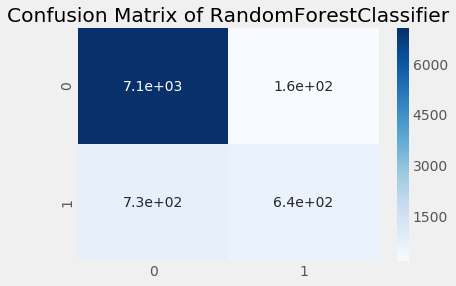

In [66]:
ax = sns.heatmap(confusion_matrix(y_test,pred),annot = True,cmap='Blues')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.title('Confusion Matrix of RandomForestClassifier')

## *Logistic Regression*

In [67]:
#Logistic Regression

lregression = LogisticRegression(max_iter = 100)
lregression.fit(X_train,y_train)
pred_i = lregression.predict(X_test)
print(classification_report(y_test,pred_i))
logregacc = accuracy_score(y_test,pred_i)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7230
           1       0.76      0.36      0.49      1368

    accuracy                           0.88      8598
   macro avg       0.82      0.67      0.71      8598
weighted avg       0.87      0.88      0.86      8598



C:\Users\andyj\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(0.5, 1, 'Confusion Matrix of Logistic Regression')

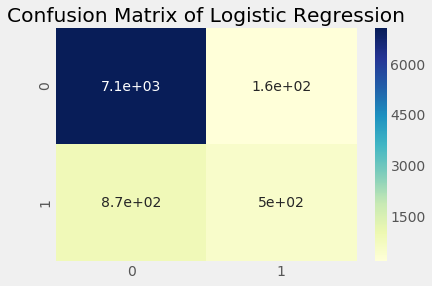

In [68]:
ax = sns.heatmap(confusion_matrix(y_test,pred_i),annot = True,cmap='YlGnBu')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.title('Confusion Matrix of Logistic Regression')

## *Support Vector Machine*

In [69]:
# SVM 


param_grid = {'C':[0.1,1,10,100,1000],
              'kernel':['rbf'],
              'gamma' : [0.1,1,10,100,1000]}
gridsearch = GridSearchCV(SVC(),param_grid = param_grid,verbose = 1)
gridsearch.fit(X_train,y_train)

svm = SVC(C=100,kernel = 'rbf',gamma = 100)
svm.fit(X_train,y_train)
pred_s = svm.predict(X_test)

print(classification_report(y_test,pred_s))
svmacc = accuracy_score(y_test,pred_s)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.3min finished


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7230
           1       0.00      0.00      0.00      1368

    accuracy                           0.84      8598
   macro avg       0.42      0.50      0.46      8598
weighted avg       0.71      0.84      0.77      8598



C:\Users\andyj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### - This model is not so helpful for our case since it can not detect the true values at all

Text(0.5, 1, 'Confusion Matrix of SupportVectorMachine')

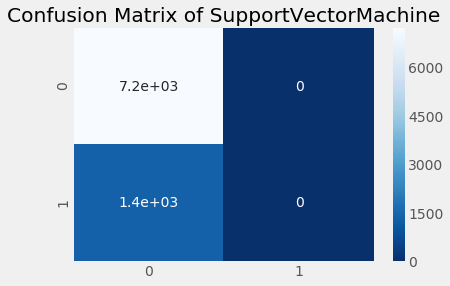

In [71]:
ax = sns.heatmap(confusion_matrix(y_test,pred_s),annot = True,cmap='Blues_r')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.title('Confusion Matrix of SupportVectorMachine')

## *KNearestNeighbors*

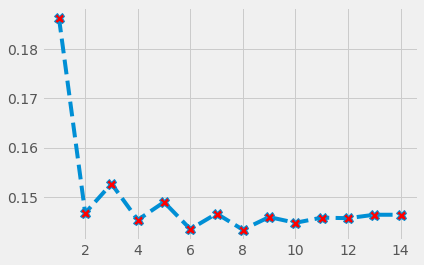

In [72]:
# KNN

error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k!= y_test))
plt.plot(range(1,15),error_rate,marker='X',linestyle='dashed',markerfacecolor='red', markersize=10)

#### - From the graph, six number of neighbours tend to have the least error rates

In [78]:
knn = KNeighborsClassifier(n_neighbors = 6 )
knn.fit(X_train,y_train)
pred_k = knn.predict(X_test)
print(classification_report(y_test,pred_k))
knnacc = accuracy_score(y_test,pred_k)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      7230
           1       0.72      0.16      0.26      1368

    accuracy                           0.86      8598
   macro avg       0.79      0.57      0.59      8598
weighted avg       0.84      0.86      0.82      8598



Text(0.5, 1, 'Confusion Matrix of Logistic Regression')

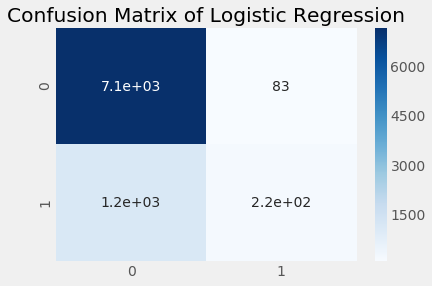

In [79]:
ax = sns.heatmap(confusion_matrix(y_test,pred_k),annot = True,cmap='Blues')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
ax.set_ylim(bottom+0.5,top-0.5)
plt.title('Confusion Matrix of Logistic Regression')

In [80]:
accuracy_df = pd.DataFrame.from_dict({'Accuracy_Score' : [rfacc,logregacc,svmacc,knnacc] }) 

accuracy_df.rename(index = {0:'RandomForestClassifier',1:'Logistic Regression', 2: 'SVM',3:'KNN'})

,Accuracy_Score
RandomForestClassifier,0.896720
Logistic Regression,0.880088
SVM,0.840893
KNN,0.856478


### So...
   - *RandomForestClassifier has the Highest Accuracy Score(~90) with highest values for Recall, Precision and F1 Score. It predicts the True Revenue most accurately compare to other models.*

# Conclusion :
### - From my analysis, customers who are interested on buying the products :
- Tend to stay longer on the website especially when they are on the website which is productrelated.
- Less likely to bounce or exit
- Have strong Correlation with the PageValues

#### - Therefore, in order to increase the customers who generates the profits, the business should find a way to decrease the BounceRates and ExitRates and improve on the quality of the page.

# Thanks for reading my project!!